# Matplotlib 教程

## 1.介绍
***
Matplotlib 可能是 Python 2D-绘图领域使用最广泛的套件。它能让使用者很轻松地将数据图形化，并且提供多样化的输出格式。这里将会探索 matplotlib 的常见用法。

### IPython 以及 pylab 模式
[IPython](http://ipython.org/) 是 Python 的一个增强版本。它在下列方面有所增强：命名输入输出、使用系统命令（shell commands）、排错（debug）能力。我们在命令行终端给 IPython 加上参数 -pylab （0.12 以后的版本是 --pylab）之后，就可以像 Matlab 或者 Mathematica 那样以交互的方式绘图。

### pylab
pylab 是 matplotlib 面向对象绘图库的一个接口。它的语法和 Matlab 十分相近。也就是说，它主要的绘图命令和 Matlab 对应的命令有相似的参数。



## 2.初级绘制
***
先尝试用默认配置在同一张图上绘制正弦和余弦函数图像，然后逐步美化它。

In [21]:
from pylab import *

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

`X` 是一个 `numpy` 数组，包含了从$-\pi$到$\pi$等间隔的 256 个值。`C` 和 `S` 则分别是这 256 个值对应的余弦和正弦函数值组成的 `numpy` 数组。

### 2.1使用默认配置
***
`Matplotlib` 的默认配置都允许用户自定义。你可以调整大多数的默认配置：**图片大小和分辨率（dpi）、线宽、颜色、风格、坐标轴、坐标轴以及网格的属性、文字与字体属性等**。不过，matplotlib 的默认配置在大多数情况下已经做得足够好，你可能只在很少的情况下才会想更改这些默认配置。

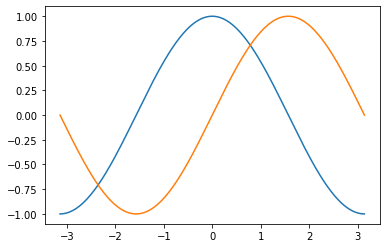

In [22]:
plot(X,C)
plot(X,S)

show()

### 2.2默认配置的具体内容
***
下面的代码中，我们展现了 `matplotlib` 的默认配置并辅以注释说明，这部分配置包含了有关绘图样式的所有配置。代码中的配置与默认配置完全相同，你可以在交互模式中修改其中的值来观察效果。

#### 2.2.1改变线条的颜色和粗细
***
* color
* linewidth

#### 2.2.2设置图片边界
***
* xlim($x_s,x_e$)
* ylim($y_s,y_e$)

#### 2.2.3设置记号
***
我们讨论正弦和余弦函数的时候，通常希望知道函数在$+\frac{\pi}{2}$和$-\frac{\pi}{2}$的值。这样看来，当前的设置就不那么理想了。
* xticks([$x_0,x_1,x_2,x_3...x_n$])
* yticks([$y_0,y_1,y_2,y_3...y_m$])

#### 2.2.4设计记号的标签
***
记号现在没问题了，不过标签却不大符合期望。我们可以把$3.14$当做是$\pi$，但毕竟不够精确。当我们设置记号的时候，我们可以同时设置记号的标签。注意这里使用了`LaTeX`。

#### 2.2.6添加图例
***
我们在图的左上角添加一个图例。为此，我们只需要在 `plot` 函数里以「键 - 值」的形式增加一个参数。
* plot(lable="  ")
* legend()

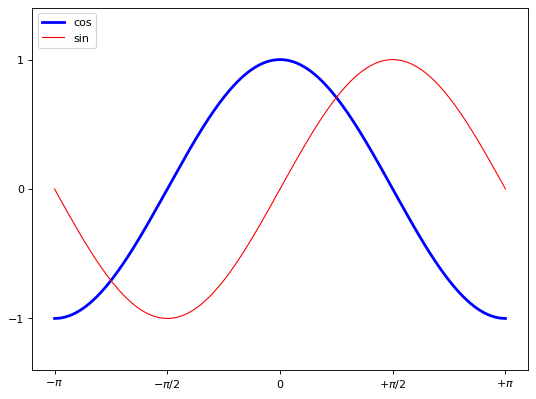

In [52]:
# 导入 matplotlib 的所有内容（nympy 可以用 np 这个名字来使用）
from pylab import *

# 创建一个 8 * 6 点（point）的图，并设置分辨率为 80
#利用 figsize=(x,y) 可以来修改图片的长宽比例
figure(figsize=(8,6), dpi=80)

# 创建一个新的 1 * 1 的子图，接下来的图样绘制在其中的第 1 块（也是唯一的一块）
#subplot(a,b,x) ==> 创建一个 a * b 的子图，下面的图样是其中的第 x 块
subplot(1,1,1)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# 绘制余弦曲线，使用蓝色的、连续的、宽度为 1 （像素）的线条
plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cos")

# 绘制正弦曲线，使用绿色的、连续的、宽度为 1 （像素）的线条
plot(X, S, color="red", linewidth=1.0, linestyle="-", label="sin")

# 设置横轴的上下限
#xlim(-4.0,4.0)
xlim(X.min()*1.1,X.max()*1.1)

# 设置横轴记号
#xticks(np.linspace(-4,4,9,endpoint=True))
#xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/{2}$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

# 设置纵轴的上下限
#ylim(-1.0,1.0)
ymin, ymax = C.min(), C.max()
dy = (ymax - ymin) * 0.2
ylim(ymin - dy, ymax + dy)

# 设置纵轴记号
#yticks(np.linspace(-1,1,5,endpoint=True))
yticks([-1, 0, +1])

# 以分辨率 72 来保存图片
#savefig("exercice_2.pdf",dpi=72)

#添加图例，loc改变图例出现的位置
legend(loc='upper left')
# 在屏幕上显示
show()

#### 2.2.5移动脊柱
***
坐标轴线和上面的记号连在一起就形成了脊柱（Spines，一条线段上有一系列的凸起，是不是很像脊柱骨啊~），它记录了数据区域的范围。它们可以放在任意位置，不过至今为止，我们都把它放在图的四边。

实际上每幅图有四条脊柱（上下左右），为了将脊柱放在图的中间，我们必须将其中的两条（上和右）设置为无色，然后调整剩下的两条到合适的位置——数据空间的 0 点。

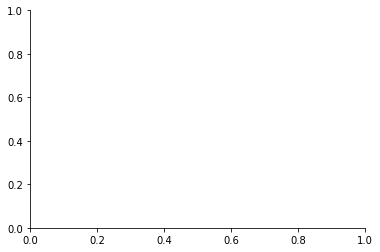

In [47]:


#调整边界框的位置，四条边的位置right,left,top,bottom
ax = gca()
#将框的两条边的颜色调为无色
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom') #设下面的那一边界线为x轴
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left') #设左边的那一边界线为y轴
ax.spines['left'].set_position(('data',0))

# 在屏幕上显示
show()